# Installing / Importing Libraries

In [1]:
#!pip install holidays

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, date 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
matplotlib.rcParams['figure.figsize'] = (10,5)

In [4]:
path = 'C:/Users/manal/Desktop/Thesis/Manali-CallsPrediction/ml-generic-thesis-project-structure-main/01-raw-data'
df_Inquiries = pd.read_csv(path+'/CallCenter_Inquiries.csv', sep=',', header=0, parse_dates=True)
df_Inquiries

,Unnamed: 0,date,date_time,inquiry_name,brief_description,YEAR,Month,Day_of_Month,Day_of_Year,Quarter,Weekday,time_hour
0,951,2017-01-01T00:00:00.000,2017-01-01T00:00:05.000,Language Assistance,Connect to Language Line.,2017,1,1,1,1,Sunday,0
1,854,2017-01-01T00:00:00.000,2017-01-01T00:01:12.000,Vehicle Blocking Driveway Complaint,Report a vehicle that is blocking a driveway.,2017,1,1,1,1,Sunday,0
2,697,2017-01-01T00:00:00.000,2017-01-01T00:01:41.000,Apartment Maintenance Complaint,Report a maintenance problem inside an apartment.,2017,1,1,1,1,Sunday,0
3,617,2017-01-01T00:00:00.000,2017-01-01T00:02:01.000,Noise from Neighbor,Report a noisy neighbor.,2017,1,1,1,1,Sunday,0
4,720,2017-01-01T00:00:00.000,2017-01-01T00:02:08.000,Find a Police Precinct or PSA by Name,Find a specific precinct or police service are...,2017,1,1,1,1,Sunday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29888780,30268221,2022-10-01T00:00:00.000,2022-10-01T01:25:29.000,Elevator or Escalator Complaint,Report a problem with an elevator or escalator.,2022,10,1,274,4,Saturday,1
29888781,30268291,2022-10-01T00:00:00.000,2022-10-01T01:27:32.000,Dirty Sidewalk,"Report a sidewalk or gutter, including 18 inch...",2022,10,1,274,4,Saturday,1
29888782,30268292,2022-10-01T00:00:00.000,2022-10-01T01:27:32.000,Dirty Yard or Alley,"Report an unclean or untidy yard, alley, or co...",2022,10,1,274,4,Saturday,1
29888783,30268243,2022-10-01T00:00:00.000,2022-10-01T01:28:13.000,Animal Abuse,Report abuse or neglect of an animal.,2022,10,1,274,4,Saturday,1


Gathering data before October 2022

In [5]:
df_Inquiries = df_Inquiries.loc[df_Inquiries['date']< '2022-10-01']

## Changing the datatypes 

In [6]:
from datetime import datetime, date 
df_Inquiries['WeekofYear'] = pd.to_datetime(df_Inquiries['date_time']).dt.week
df_Inquiries['date'] = pd.DatetimeIndex(df_Inquiries['date_time']).date
df_Inquiries['date_time'] = pd.to_datetime(df_Inquiries['date_time'])
df_Inquiries['time_hour'] = pd.DatetimeIndex(df_Inquiries['date_time']).hour
#df_Inquiries['time'] = pd.DatetimeIndex(df_Inquiries['date_time']).time
df_Inquiries.head()

C:\Users\manal\AppData\Local\Temp\ipykernel_13492\2966527844.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_Inquiries['WeekofYear'] = pd.to_datetime(df_Inquiries['date_time']).dt.week
C:\Users\manal\AppData\Local\Temp\ipykernel_13492\2966527844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Inquiries['WeekofYear'] = pd.to_datetime(df_Inquiries['date_time']).dt.week
C:\Users\manal\AppData\Local\Temp\ipykernel_13492\2966527844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Unnamed: 0,date,date_time,inquiry_name,brief_description,YEAR,Month,Day_of_Month,Day_of_Year,Quarter,Weekday,time_hour,WeekofYear
0,951,2017-01-01,2017-01-01 00:00:05,Language Assistance,Connect to Language Line.,2017,1,1,1,1,Sunday,0,52
1,854,2017-01-01,2017-01-01 00:01:12,Vehicle Blocking Driveway Complaint,Report a vehicle that is blocking a driveway.,2017,1,1,1,1,Sunday,0,52
2,697,2017-01-01,2017-01-01 00:01:41,Apartment Maintenance Complaint,Report a maintenance problem inside an apartment.,2017,1,1,1,1,Sunday,0,52
3,617,2017-01-01,2017-01-01 00:02:01,Noise from Neighbor,Report a noisy neighbor.,2017,1,1,1,1,Sunday,0,52
4,720,2017-01-01,2017-01-01 00:02:08,Find a Police Precinct or PSA by Name,Find a specific precinct or police service are...,2017,1,1,1,1,Sunday,0,52


In [7]:
df_Inquiries.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29888689 entries, 0 to 29888688
Data columns (total 13 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Unnamed: 0         int64         
 1   date               object        
 2   date_time          datetime64[ns]
 3   inquiry_name       object        
 4   brief_description  object        
 5   YEAR               int64         
 6   Month              int64         
 7   Day_of_Month       int64         
 8   Day_of_Year        int64         
 9   Quarter            int64         
 10  Weekday            object        
 11  time_hour          int64         
 12  WeekofYear         int64         
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 3.1+ GB


In [8]:
df_Inquiries.nunique()

Unnamed: 0           29888689
date                     2092
date_time            23165631
inquiry_name             6291
brief_description        6842
YEAR                        6
Month                      12
Day_of_Month               31
Day_of_Year               366
Quarter                     4
Weekday                     7
time_hour                  24
WeekofYear                 53
dtype: int64

In [9]:
df_Inquiries.isna().sum()

Unnamed: 0           0
date                 0
date_time            0
inquiry_name         0
brief_description    0
YEAR                 0
Month                0
Day_of_Month         0
Day_of_Year          0
Quarter              0
Weekday              0
time_hour            0
WeekofYear           0
dtype: int64

In [10]:
df_Inquiries.isnull().sum()

Unnamed: 0           0
date                 0
date_time            0
inquiry_name         0
brief_description    0
YEAR                 0
Month                0
Day_of_Month         0
Day_of_Year          0
Quarter              0
Weekday              0
time_hour            0
WeekofYear           0
dtype: int64

## Features:
UNIQUE_ID          : Unique identifier of inquiry record
date_time          : Timestamp the call was received 
AGENCY	           : Acronym of agency associated with the specific topic.
INQUIRY_NAME	   : Topic the call center representative used to resolve the customer’s inquiry.
BRIEF_DESCRIPTION  : Brief description of the topic

In [11]:
#AGENCY = df_Inquiries.loc[(df_Inquiries.agency !=0)&(df_Inquiries.agency !='0')].groupby(['agency']).count()[['date']].rename(columns={'date':'Inquiries'})
#ax = AGENCY.unstack(level=0).plot(kind='line', subplots=False, rot=0, figsize=(10, 5))
#ax.tick_params(axis='x', rotation=90, labelsize=10)

## Removing irrelevant columns

Data for Columns Agency & Call_resolution is not present after 2019

In [12]:
df_Inquiries = df_Inquiries.drop(columns=['Unnamed: 0'])
#df_Inquiries = df_Inquiries.drop(columns=['Unnamed: 0','agency','agency_name','call_resolution','time'])

In [13]:
df_Inquiries_indexed = df_Inquiries.set_index('date_time')

In [14]:
df_Inquiries_indexed.head(2)

,Unnamed: 0,date,inquiry_name,brief_description,YEAR,Month,Day_of_Month,Day_of_Year,Quarter,Weekday,time_hour,WeekofYear
date_time,,,,,,,,,,,,
2017-01-01 00:00:05,951,2017-01-01,Language Assistance,Connect to Language Line.,2017,1,1,1,1,Sunday,0,52
2017-01-01 00:01:12,854,2017-01-01,Vehicle Blocking Driveway Complaint,Report a vehicle that is blocking a driveway.,2017,1,1,1,1,Sunday,0,52


# Saving updated dataset

In [15]:
#df_Inquiries.to_csv(path+'Call_Inquiries_updated.csv', sep=',')

# Target setting

In [34]:
Stats_Univariate_data = df_Inquiries.groupby(['date'],as_index=False).size().rename(columns={'size':'Inquiries'})

In [17]:
Stats_Univariate_data

,date,Inquiries
0,2017-01-01,7574
1,2017-01-02,13189
2,2017-01-03,24678
3,2017-01-04,23380
4,2017-01-05,22809
...,...,...
2087,2022-09-26,13039
2088,2022-09-27,11598
2089,2022-09-28,11886
2090,2022-09-29,11772


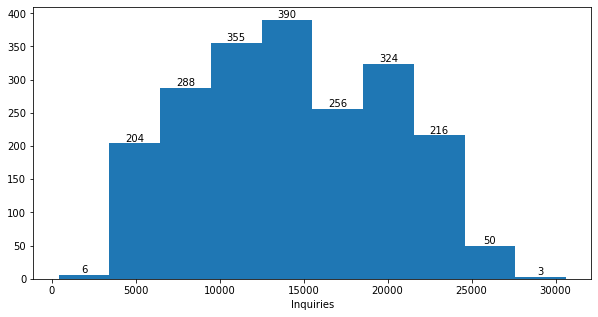

In [18]:
counts, edges, bars = plt.hist(Stats_Univariate_data['Inquiries'])
plt.bar_label(bars)
plt.xlabel('Inquiries')
plt.show()

Bimodal distribution with some outliers to be analyzeed

<AxesSubplot:ylabel='Density'>

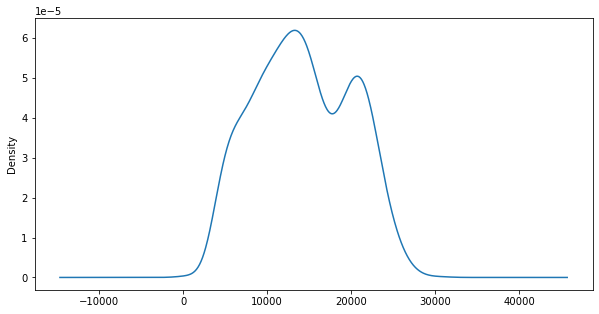

In [19]:
Stats_Univariate_data['Inquiries'].plot(kind='density')

# Lag plot

Linear shape suggests autoregressor is a better choice

### First order lag-plot

### 1 day lag (Autocorrelation)

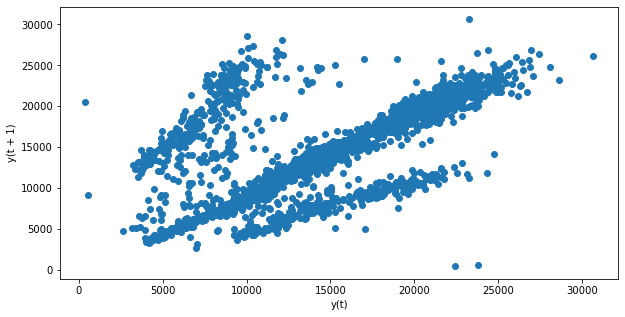

In [20]:
pd.plotting.lag_plot(Stats_Univariate_data['Inquiries'],lag=1)
plt.show()

### 1 week lag (Autocorrelation)

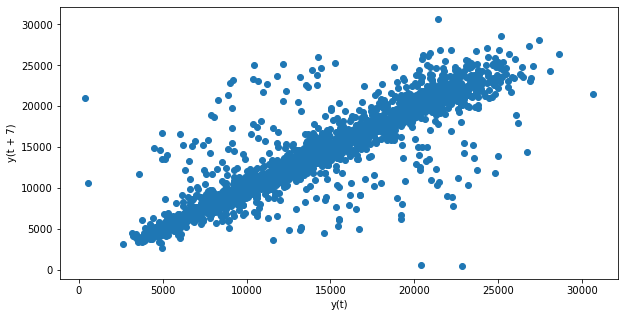

In [21]:
pd.plotting.lag_plot(Stats_Univariate_data['Inquiries'],lag=7)
plt.show()

### 1 month lag (Autocorrelation)

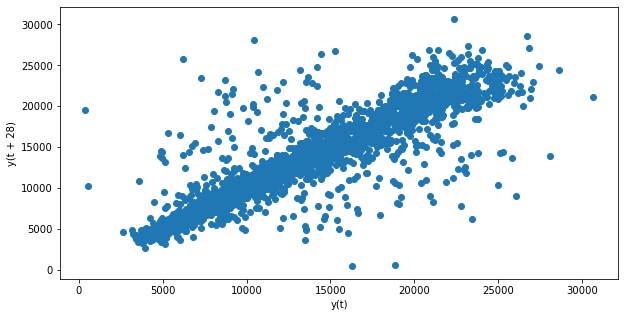

In [22]:
pd.plotting.lag_plot(Stats_Univariate_data['Inquiries'],lag=28)
plt.show()

### 1 year lag (Autocorrelation)

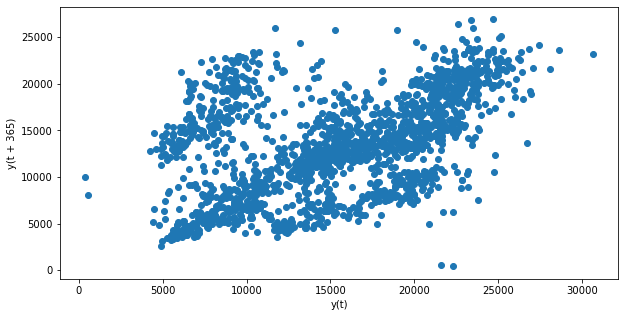

In [23]:
pd.plotting.lag_plot(Stats_Univariate_data['Inquiries'],lag=365)
plt.show()

### 6 months lag (Autocorrelation)

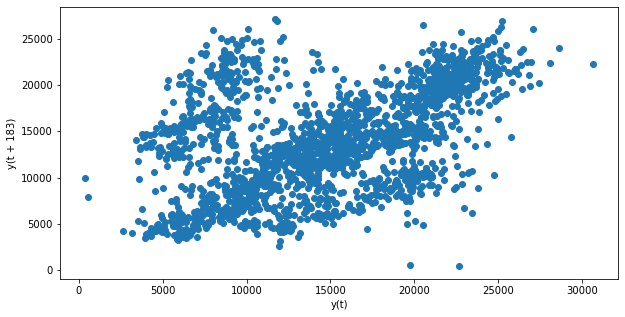

In [24]:
pd.plotting.lag_plot(Stats_Univariate_data['Inquiries'],lag=183)
plt.show()

### 3 months lag (Autocorrelation)

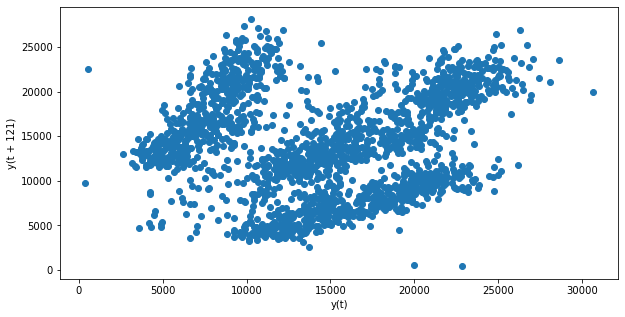

In [25]:
pd.plotting.lag_plot(Stats_Univariate_data['Inquiries'],lag=121)
plt.show()

### 4 months lag (Autocorrelation)

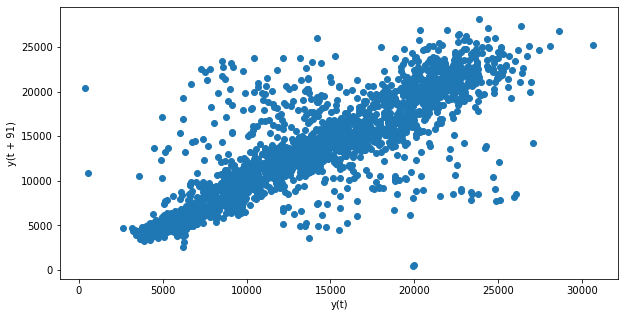

In [26]:
pd.plotting.lag_plot(Stats_Univariate_data['Inquiries'],lag=91)
plt.show()

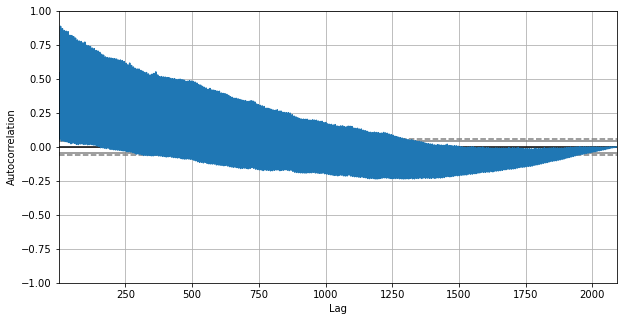

In [27]:
pd.plotting.autocorrelation_plot(Stats_Univariate_data['Inquiries'])
plt.show()

As the lag increases, autocorrelation also increases

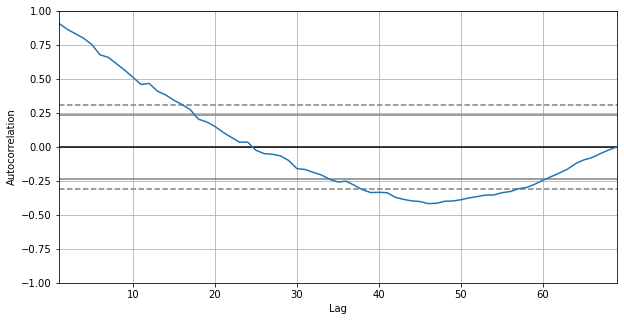

In [51]:
Stats_Univariate_data['date'] = pd.to_datetime(Stats_Univariate_data['date'])
pd.plotting.autocorrelation_plot(Stats_Univariate_data.set_index('date')['Inquiries'].resample("1m").mean())
plt.show()

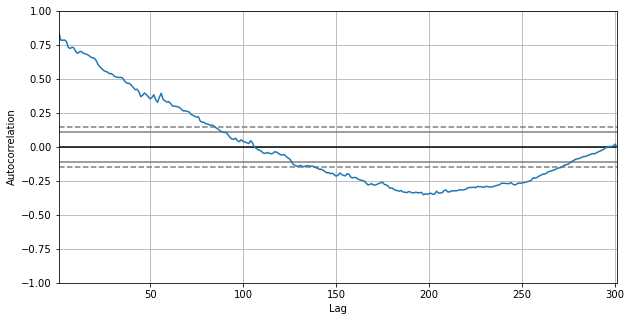

In [53]:
pd.plotting.autocorrelation_plot(Stats_Univariate_data.set_index('date')['Inquiries'].resample('W').sum())
plt.show()

In [54]:
import plotly.express as px
fig = px.line(Stats_Univariate_data.reset_index(), x= 'date' , y='Inquiries')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                      step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)